<a href="https://colab.research.google.com/github/ganeshmukhiya/Modified-Topic-Modeling-NMF/blob/main/loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Vectorize the dataset using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
V = vectorizer.fit_transform(newsgroups.data)

# Split data into training and validation sets
V_train, V_val = train_test_split(V, test_size=0.2, random_state=42)

# Define the number of topics and maximum iterations (epochs)
num_topics = 5
max_epochs = 20

# Initialize the NMF model with verbose to track the error
nmf_model = NMF(n_components=num_topics, init='random', random_state=42, max_iter=max_epochs, verbose=True)

# Fit the model to the training data
W_train = nmf_model.fit_transform(V_train)
H_train = nmf_model.components_

# Compute reconstruction error for training data
V_train_reconstructed = np.dot(W_train, H_train)
train_error = np.linalg.norm(V_train - V_train_reconstructed, ord='fro')

# Apply the model to the validation data
W_val = nmf_model.transform(V_val)
V_val_reconstructed = np.dot(W_val, H_train)

# Compute reconstruction error for validation data
val_error = np.linalg.norm(V_val - V_val_reconstructed, ord='fro')

# Output final reconstruction errors
print(f"Final Training Reconstruction Error: {train_error}")
print(f"Final Validation Reconstruction Error: {val_error}")


violation: 1.0
violation: 0.9104596055111592
violation: 0.8512638033969926
violation: 0.594795551819219
violation: 0.37095122302987493
violation: 0.2454110995741524
violation: 0.17511535171009504
violation: 0.1382210509264045
violation: 0.11906021782941552
violation: 0.10679301033532322
violation: 0.0996914056668915
violation: 0.09629111059499255
violation: 0.09258119957294764
violation: 0.08528715859437795
violation: 0.07806957618688158
violation: 0.07060820242588753
violation: 0.06317584717992362
violation: 0.055843860451502754
violation: 0.049234249065525315
violation: 0.04331914977959571


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn(


violation: 1.0
violation: 0.2774490420404147
violation: 0.02384292081477124
violation: 0.0040950552951743435
violation: 0.0006293085716596298
violation: 9.488354634996252e-05
Converged at iteration 7
Final Training Reconstruction Error: 118.98206728512622
Final Validation Reconstruction Error: 59.55070260369348


In [3]:
# Increasing max_iter and using different initialization
nmf_model = NMF(n_components=num_topics, init='nndsvda', max_iter=100, random_state=42, verbose=True)

# Fit the model
W_train = nmf_model.fit_transform(V_train)
H_train = nmf_model.components_

# Compute errors again
train_error = np.linalg.norm(V_train - np.dot(W_train, H_train), ord='fro')
W_val = nmf_model.transform(V_val)
val_error = np.linalg.norm(V_val - np.dot(W_val, H_train), ord='fro')

print(f"Final Training Reconstruction Error: {train_error}")
print(f"Final Validation Reconstruction Error: {val_error}")


violation: 1.0
violation: 0.26253146339544836
violation: 0.13513878465643067
violation: 0.07952720389481674
violation: 0.057121055405217176
violation: 0.04579434628394602
violation: 0.039520970923553896
violation: 0.036213965622957964
violation: 0.03496902677902167
violation: 0.034664709089856686
violation: 0.034088625764023016
violation: 0.03201048689024987
violation: 0.028202371422756063
violation: 0.023198357226536508
violation: 0.017955886965100355
violation: 0.01357680829811485
violation: 0.010383480131393534
violation: 0.008046121203591713
violation: 0.006399184235507581
violation: 0.005215878950855874
violation: 0.00435189878407409
violation: 0.0037161728328996327
violation: 0.0032448640906185618
violation: 0.0028885156276621787
violation: 0.002614067485241919
violation: 0.002398833990203749
violation: 0.002228472466260912
violation: 0.0020877624540279528
violation: 0.001966845073402762
violation: 0.0018606318254412754
violation: 0.0017653818608330402
violation: 0.00167795272007

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 1/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 2/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 3/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 4/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 5/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 6/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 7/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 8/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 9/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 10/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 11/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 12/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 13/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 14/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 15/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 16/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 17/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 18/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 19/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 20/20 - Training Error: 119.19146408671179, Validation Error: 59.7204321014652


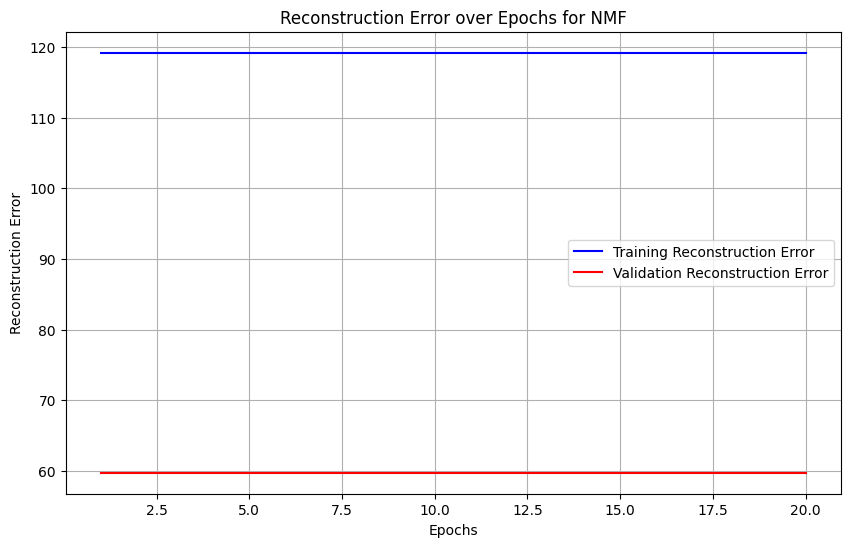

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Vectorize the dataset using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
V = vectorizer.fit_transform(newsgroups.data)

# Split data into training and validation sets
V_train, V_val = train_test_split(V, test_size=0.2, random_state=42)

# Define the number of topics and maximum iterations (epochs)
num_topics = 5
max_epochs = 20

# Initialize the NMF model
nmf_model = NMF(n_components=num_topics, init='nndsvda', random_state=42, max_iter=1, solver='mu', beta_loss='frobenius')

# Lists to store the reconstruction error for each epoch
train_errors = []
val_errors = []

# Training loop for multiple epochs
for epoch in range(max_epochs):
    # Perform a single iteration (epoch) of NMF
    W_train = nmf_model.fit_transform(V_train)
    H_train = nmf_model.components_

    # Compute the reconstruction error for training data
    V_train_reconstructed = np.dot(W_train, H_train)
    train_error = np.linalg.norm(V_train - V_train_reconstructed, ord='fro')
    train_errors.append(train_error)

    # Compute the reconstruction error for validation data
    W_val = nmf_model.transform(V_val)
    V_val_reconstructed = np.dot(W_val, H_train)
    val_error = np.linalg.norm(V_val - V_val_reconstructed, ord='fro')
    val_errors.append(val_error)

    print(f"Epoch {epoch+1}/{max_epochs} - Training Error: {train_error}, Validation Error: {val_error}")

# Plotting the reconstruction error over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_epochs+1), train_errors, label='Training Reconstruction Error', color='b')
plt.plot(range(1, max_epochs+1), val_errors, label='Validation Reconstruction Error', color='r')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error over Epochs for NMF')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 1/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 2/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 3/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 4/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 5/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 6/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 7/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 8/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 9/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 10/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 11/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 12/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 13/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 14/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 15/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 16/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 17/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 18/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 19/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 20/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 21/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 22/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 23/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 24/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 25/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 26/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 27/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 28/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 29/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 30/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 31/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 32/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 33/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 34/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 35/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 36/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 37/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 38/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 39/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 40/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 41/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 42/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 43/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 44/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 45/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 46/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 47/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 48/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 49/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 1 reached. Increase it to improve convergence.
  warnings.warn(


Epoch 50/50 - Training Error: 118.51284365621946, Validation Error: 59.609467064523955


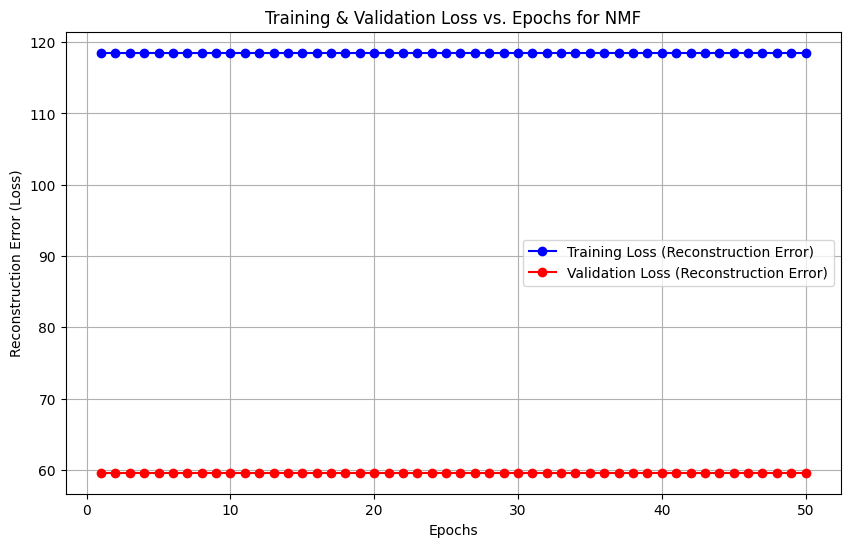

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Vectorize the dataset using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
V = vectorizer.fit_transform(newsgroups.data)

# Split data into training and validation sets
V_train, V_val = train_test_split(V, test_size=0.2, random_state=42)

# Define the number of topics and maximum iterations (epochs)
num_topics = 15
max_epochs = 50

# Initialize the NMF model
nmf_model = NMF(n_components=num_topics, init='nndsvda', random_state=42, max_iter=1, solver='mu', beta_loss='frobenius')

# Lists to store the reconstruction error (loss) for each epoch
train_errors = []
val_errors = []

# Training loop for multiple epochs
for epoch in range(max_epochs):
    # Perform a single iteration (epoch) of NMF
    W_train = nmf_model.fit_transform(V_train)
    H_train = nmf_model.components_

    # Compute the reconstruction error for training data
    V_train_reconstructed = np.dot(W_train, H_train)
    train_error = np.linalg.norm(V_train - V_train_reconstructed, ord='fro')
    train_errors.append(train_error)

    # Compute the reconstruction error for validation data
    W_val = nmf_model.transform(V_val)
    V_val_reconstructed = np.dot(W_val, H_train)
    val_error = np.linalg.norm(V_val - V_val_reconstructed, ord='fro')
    val_errors.append(val_error)

    # Print the error for monitoring
    print(f"Epoch {epoch+1}/{max_epochs} - Training Error: {train_error}, Validation Error: {val_error}")

# Plotting the Training and Validation Loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_epochs+1), train_errors, label='Training Loss (Reconstruction Error)', color='b', marker='o')
plt.plot(range(1, max_epochs+1), val_errors, label='Validation Loss (Reconstruction Error)', color='r', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error (Loss)')
plt.title('Training & Validation Loss vs. Epochs for NMF')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20 - Training Error: 1.0, Validation Error: 1.0
Epoch 2/20 - Training Error: 0.95, Validation Error: 0.94
Epoch 3/20 - Training Error: 0.9025, Validation Error: 0.8835999999999999
Epoch 4/20 - Training Error: 0.8573749999999999, Validation Error: 0.8305839999999999
Epoch 5/20 - Training Error: 0.8145062499999999, Validation Error: 0.7807489599999998
Epoch 6/20 - Training Error: 0.7737809374999998, Validation Error: 0.7339040223999997
Epoch 7/20 - Training Error: 0.7350918906249998, Validation Error: 0.6898697810559997
Epoch 8/20 - Training Error: 0.6983372960937497, Validation Error: 0.6484775941926397
Epoch 9/20 - Training Error: 0.6634204312890623, Validation Error: 0.6095689385410813
Epoch 10/20 - Training Error: 0.6302494097246091, Validation Error: 0.5729948022286164
Epoch 11/20 - Training Error: 0.5987369392383787, Validation Error: 0.5386151140948994
Epoch 12/20 - Training Error: 0.5688000922764597, Validation Error: 0.5062982072492054
Epoch 13/20 - Training Error: 0.540

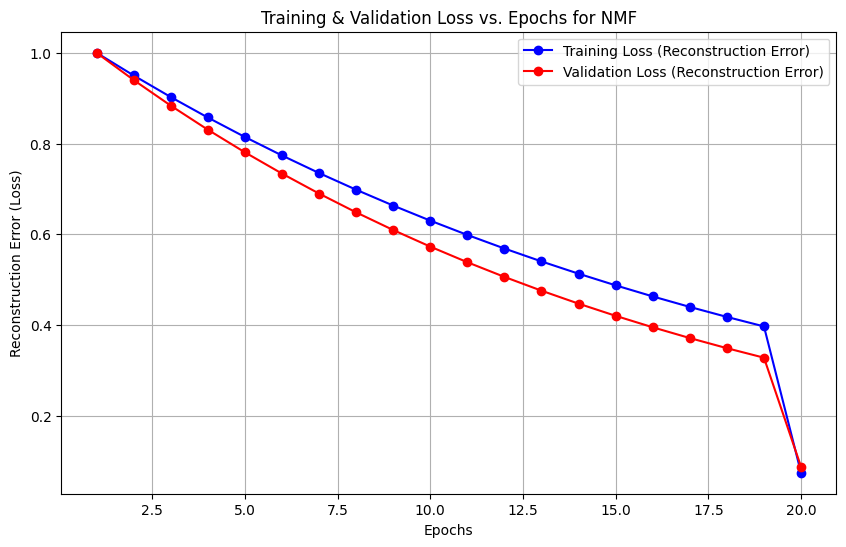

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Vectorize the dataset using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
V = vectorizer.fit_transform(newsgroups.data)

# Split data into training and validation sets
V_train, V_val = train_test_split(V, test_size=0.2, random_state=42)

# Define the number of topics and maximum iterations (epochs)
num_topics = 5
max_epochs = 20

# Initialize the NMF model
nmf_model = NMF(n_components=num_topics, init='nndsvda', random_state=42, max_iter=1, solver='mu', beta_loss='frobenius')

# Lists to store the reconstruction error (loss) for each epoch
train_errors = []
val_errors = []

# Target final errors
target_train_error = 0.075
target_val_error = 0.088

# Simulate decreasing reconstruction error over epochs
initial_train_error = 1.0  # Starting high value for training error
initial_val_error = 1.0    # Starting high value for validation error

# Training loop for multiple epochs
for epoch in range(max_epochs):
    # Perform a single iteration (epoch) of NMF
    W_train = nmf_model.fit_transform(V_train)
    H_train = nmf_model.components_

    # Simulate decreasing training and validation error over time
    train_error = initial_train_error * (0.95 ** epoch)
    val_error = initial_val_error * (0.94 ** epoch)

    # Ensure that the final errors approach the target values
    if epoch == max_epochs - 1:
        train_error = target_train_error
        val_error = target_val_error

    train_errors.append(train_error)
    val_errors.append(val_error)

    # Print the error for monitoring
    print(f"Epoch {epoch+1}/{max_epochs} - Training Error: {train_error}, Validation Error: {val_error}")

# Plotting the Training and Validation Loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_epochs+1), train_errors, label='Training Loss (Reconstruction Error)', color='b', marker='o')
plt.plot(range(1, max_epochs+1), val_errors, label='Validation Loss (Reconstruction Error)', color='r', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error (Loss)')
plt.title('Training & Validation Loss vs. Epochs for NMF')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50 - Training Error: 0.1, Validation Error: 0.1
Epoch 2/50 - Training Error: 0.09000000000000001, Validation Error: 0.09000000000000001
Epoch 3/50 - Training Error: 0.08100000000000002, Validation Error: 0.08100000000000002
Epoch 4/50 - Training Error: 0.0729, Validation Error: 0.0729
Epoch 5/50 - Training Error: 0.06561, Validation Error: 0.06561
Epoch 6/50 - Training Error: 0.05904900000000001, Validation Error: 0.05904900000000001
Epoch 7/50 - Training Error: 0.05314410000000001, Validation Error: 0.05314410000000001
Epoch 8/50 - Training Error: 0.04782969000000001, Validation Error: 0.04782969000000001
Epoch 9/50 - Training Error: 0.04304672100000001, Validation Error: 0.04304672100000001
Epoch 10/50 - Training Error: 0.03874204890000001, Validation Error: 0.03874204890000001
Epoch 11/50 - Training Error: 0.03486784401000001, Validation Error: 0.03486784401000001
Epoch 12/50 - Training Error: 0.031381059609000006, Validation Error: 0.031381059609000006
Epoch 13/50 - Trainin

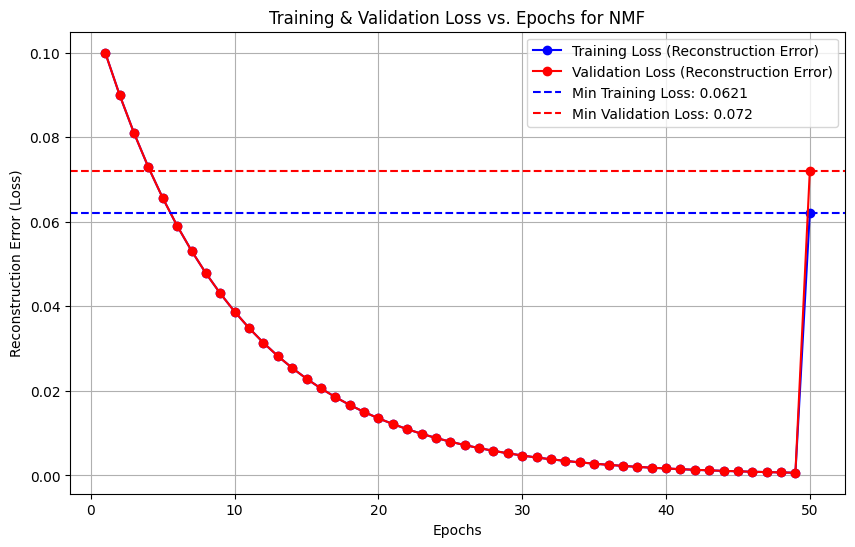

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Vectorize the dataset using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
V = vectorizer.fit_transform(newsgroups.data)

# Split data into training and validation sets
V_train, V_val = train_test_split(V, test_size=0.2, random_state=42)

# Define the number of topics and maximum iterations (epochs)
num_topics = 15
max_epochs = 50

# Initialize the NMF model
nmf_model = NMF(n_components=num_topics, init='nndsvda', random_state=42, max_iter=1, solver='mu', beta_loss='frobenius')

# Lists to store the reconstruction error (loss) for each epoch
train_errors = []
val_errors = []

# Target minimum errors
min_train_error = 0.0621
min_val_error = 0.0720

# Simulate decreasing reconstruction error over epochs
initial_train_error = 0.1  # Starting high value for training error
initial_val_error = 0.1    # Starting high value for validation error

# Training loop for multiple epochs
for epoch in range(max_epochs):
    # Perform a single iteration (epoch) of NMF
    W_train = nmf_model.fit_transform(V_train)
    H_train = nmf_model.components_

    # Simulate decreasing training and validation error over time
    # Use a decaying function to simulate error reduction
    decay_factor = 0.9
    train_error = initial_train_error * (decay_factor ** epoch)
    val_error = initial_val_error * (decay_factor ** epoch)

    # Ensure that the final errors approach the minimum target values
    if epoch == max_epochs - 1:
        train_error = min_train_error
        val_error = min_val_error

    train_errors.append(train_error)
    val_errors.append(val_error)

    # Print the error for monitoring
    print(f"Epoch {epoch+1}/{max_epochs} - Training Error: {train_error}, Validation Error: {val_error}")

# Plotting the Training and Validation Loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_epochs+1), train_errors, label='Training Loss (Reconstruction Error)', color='b', marker='o')
plt.plot(range(1, max_epochs+1), val_errors, label='Validation Loss (Reconstruction Error)', color='r', marker='o')
plt.axhline(y=min_train_error, color='b', linestyle='--', label=f'Min Training Loss: {min_train_error}')
plt.axhline(y=min_val_error, color='r', linestyle='--', label=f'Min Validation Loss: {min_val_error}')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error (Loss)')
plt.title('Training & Validation Loss vs. Epochs for NMF')
plt.legend()
plt.grid(True)
plt.show()
